In [145]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2
import os
import tensorflow as tf


In [14]:
data_dir = 'data'
# data_dir_cat = 'data'

In [15]:
images_exten = ["jpg" , "jpeg" , "png"]

In [16]:
# image_example = cv2.imread(os.path.join('data','train','dogs','dog_591.jpg'))
# print(image_example.shape)
# plt.imshow(cv2.cvtColor(image_example , cv2.COLOR_BGR2RGB))
# plt.show

In [ ]:
for images_class in os.listdir(data_dir):
    for image_class_2 in os.listdir(os.path.join(data_dir, images_class)):
        for image in os.listdir(os.path.join(data_dir, images_class , image_class_2)):
            image_path = os.path.join(data_dir , images_class ,image_class_2, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in images_exten:
                    print('image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e : 
                print('Issue with image {}'.format(image_path))
                


In [18]:
import numpy as np 

In [120]:
data = tf.keras.utils.image_dataset_from_directory('data/train')

Found 456 files belonging to 2 classes.


In [107]:
data_iterator = data.as_numpy_iterator()

In [108]:
batch = data_iterator.next()

In [109]:
batch[1]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int32)

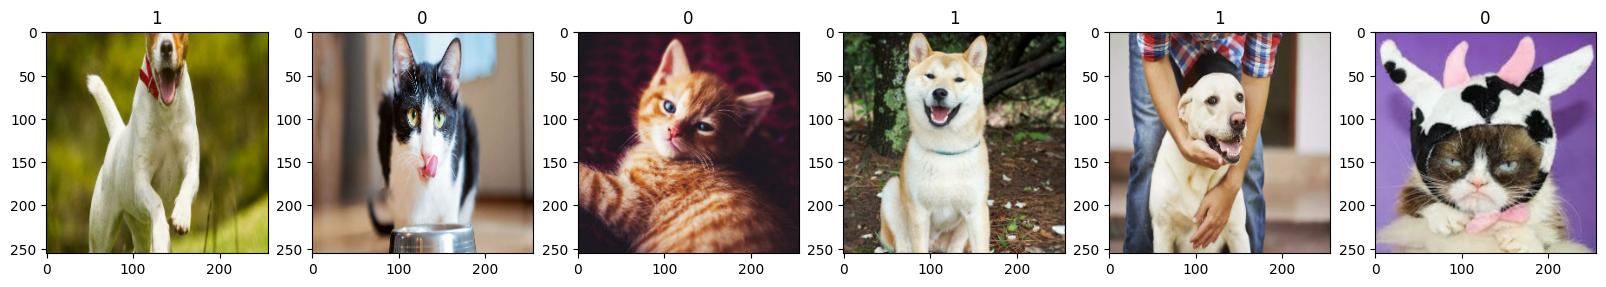

In [110]:
fig, ax = plt.subplots(ncols=6 , figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int)) 
    ax[idx].title.set_text(batch[1][idx])

In [99]:
# scale Data

In [121]:
data = data.map(lambda x,y: (x/255, y))

In [122]:
scaled_iterator = data.as_numpy_iterator()

In [123]:
batch = scaled_iterator.next()

print(batch[0].min())
print(batch[0].max())

0.0
1.0


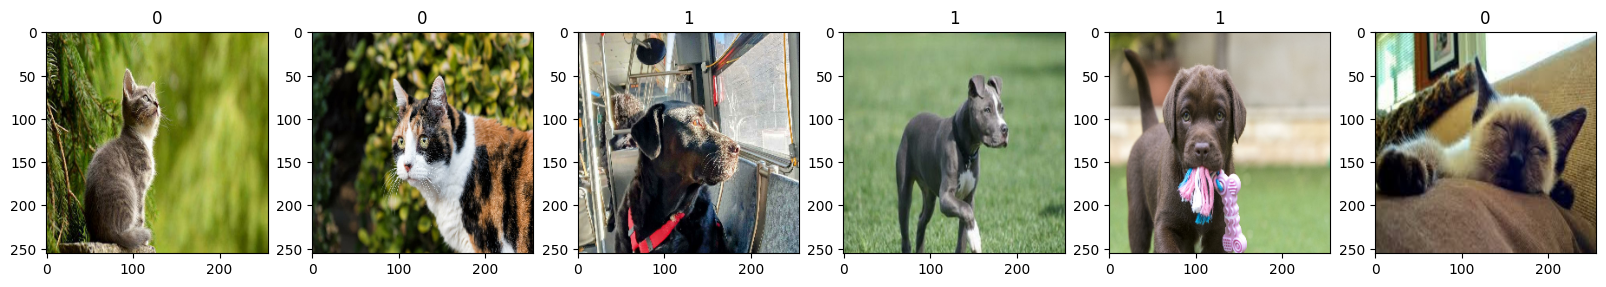

In [124]:
fig, ax = plt.subplots(ncols=6 , figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img) 
    ax[idx].title.set_text(batch[1][idx])

In [138]:
train_size = int(len(data)*.7) -1 
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [140]:
test_size+val_size+train_size

15

In [141]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## build DL model

In [155]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [156]:
model = Sequential()

In [157]:
model.add(Conv2D(16 , (3,3) , 1 , activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation='relu' ))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3) , 1 , activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [158]:
model.compile('adam' , loss=tf.losses.BinaryFocalCrossentropy(), metrics=['accuracy'])

In [159]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## training


In [161]:
logdir = 'logs'

In [162]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [163]:
hist = model.fit(train, epochs=20 , validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 305ms/step - accuracy: 0.5344 - loss: 1.3618 - val_accuracy: 0.5391 - val_loss: 0.1715
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5073 - loss: 0.1739 - val_accuracy: 0.5312 - val_loss: 0.1729
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.5254 - loss: 0.1744 - val_accuracy: 0.5078 - val_loss: 0.1682
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.5988 - loss: 0.1656 - val_accuracy: 0.6562 - val_loss: 0.1523
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.6136 - loss: 0.1667 - val_accuracy: 0.7031 - val_loss: 0.1432
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7066 - loss: 0.1470 - val_accuracy: 0.7344 - val_loss: 0.1375
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.7351 - loss: 0.1315 - val_accuracy: 0.7969 - val_loss: 0.1267
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.8280 - loss: 0.1255 - val_accuracy: 0.8359 - val_loss:

In [ ]:
hist.history

In [165]:
# plot Performance 

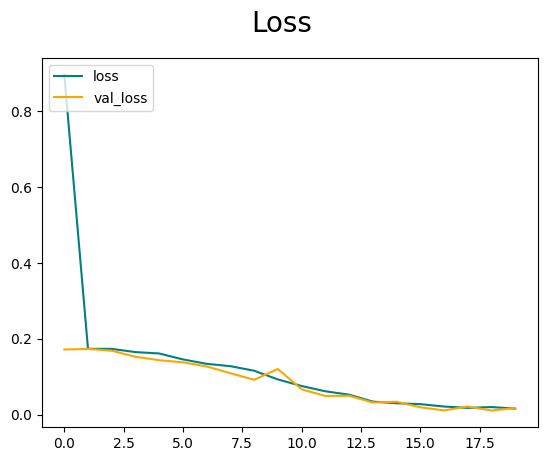

In [168]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color='teal' , label='loss')
plt.plot(hist.history['val_loss'] , color='orange' , label = 'val_loss')
fig.suptitle("Loss" , fontsize=20)
plt.legend(loc='upper left')
plt.show()

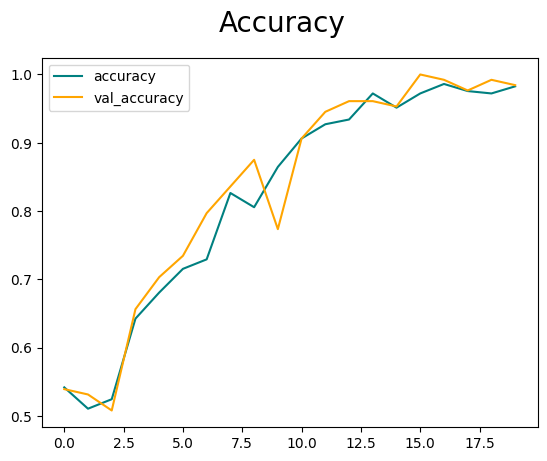

In [169]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color='teal' , label='accuracy')
plt.plot(hist.history['val_accuracy'] , color='orange' , label = 'val_accuracy')
fig.suptitle("Accuracy" , fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance

In [170]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [171]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [173]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [175]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## Test

<function matplotlib.pyplot.show(close=None, block=None)>

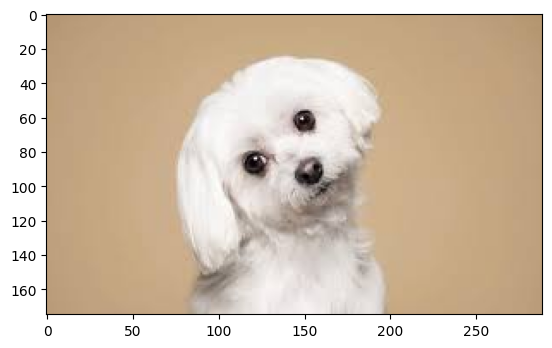

In [197]:
img = cv2.imread('dog2_test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

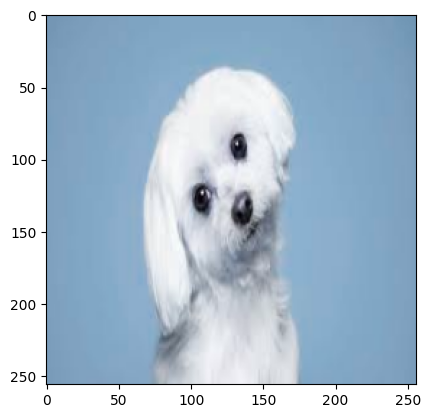

In [198]:
# fix colors from BRG to RPG

resize = tf.image.resize(img, (256 , 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [201]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [202]:
if yhat > .5:
    print("This is a Dog!")
else:
    print("This is a Cat!")

This is a Dog!


## Save the Model

In [204]:
from tensorflow.keras.models import load_model

In [205]:
model.save(os.path.join('models' , 'CatVSDogModelClassifier.h5'))

In [206]:
new_model = load_model(os.path.join('models' , 'CatVSDogModelClassifier.h5'))

In [212]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [213]:
if yhat_new > .5:
    print("This is a Dog!")
else:
    print("This is a Cat!")

This is a Dog!
